# Overview:

An e-commerce company wants to segment its customers and determine marketing strategies according to these segments.

To this end, we will define the behavior of customers and create groups according to clusters in these behaviors.

In other words, we will include those who exhibit common behaviors in the same groups and we will try to develop special sales and marketing techniques for these groups.



**Dataset**

The dataset provides 12 months (August 2016 to August 2017) of obfuscated Google Analytics 360 data from the Google Merchandise Store , a real ecommerce store that sells Google-branded merchandise, in BigQuery.
It’s a great way analyze business data and learn the benefits of using BigQuery to analyze Analytics 360 data Learn more about the data.


# K-Means Overview:



**K-means** is one of the most basic clustering algorithms.  It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center. 

In [44]:
# importing libraries:

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,10]
sns.set_style("whitegrid")
sns.set_context("talk")

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml

# Make better use of Jupyter Notebook cell width:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))
pd.options.display.float_format = '{:.2f}'.format

# make prettier plots:
%config InlineBackend.figure_format = 'svg' 

/var/folders/dh/dppk1_q11fdgnj8_3qw_g77w0000gn/T/ipykernel_97949/735741064.py:19: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [8]:
# Reading data:

df = pd.read_csv("bq-results-20220611-194240-1654979511554.csv")

df

,Date,VisitStartTime,UniqueSessionId,User,VisitId,VisitNumber,Source,Medium,Device,OperatingSystem,Browser,Channel,State,Orders,PageViews,Visits,DurationMinutes,Sales
0,20160808,2016-08-08 10:47:20 UTC,00001141565431356831470653240,114156543135683,1470653240,1,youtube.com,referral,desktop,Macintosh,Safari,Social,Istanbul,0,1,1,0.00,0.00
1,20161127,2016-11-27 23:24:48 UTC,0000334710596186211480289088,33471059618621,1480289088,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,1,1,0.00,0.00
2,20161117,2016-11-18 06:19:36 UTC,00004262415776669851479449976,426241577666985,1479449976,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,2,1,0.83,0.00
3,20170317,2017-03-17 18:06:34 UTC,00020567090152690961489773994,2056709015269096,1489773994,1,youtube.com,referral,mobile,Android,Chrome,Social,Istanbul,0,1,1,0.00,0.00
4,20161116,2016-11-16 21:56:38 UTC,00023885405233283761479333398,2388540523328376,1479333398,1,youtube.com,referral,desktop,Windows,Chrome,Social,Izmir,0,1,1,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20517,20161110,2016-11-11 06:06:06 UTC,99975166713197525211478844366,9997516671319752521,1478844366,1,youtube.com,referral,desktop,Windows,Chrome,Social,not available in demo dataset,0,1,1,0.00,0.00
20518,20161031,2016-10-31 08:15:44 UTC,99975332962386839041477901744,9997533296238683904,1477901744,1,youtube.com,referral,desktop,Windows,Chrome,Social,not available in demo dataset,0,1,1,0.00,0.00
20519,20161024,2016-10-24 21:16:59 UTC,99977192013940906311477343819,9997719201394090631,1477343819,1,youtube.com,referral,desktop,Macintosh,Safari,Social,Izmir,0,2,1,0.85,0.00
20520,20161111,2016-11-11 16:31:51 UTC,9998306107532603031478881911,999830610753260303,1478881911,1,youtube.com,referral,desktop,Windows,Chrome,Social,Antalya,0,1,1,0.00,0.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20522 entries, 0 to 20521
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             20522 non-null  int64  
 1   VisitStartTime   20522 non-null  object 
 2   UniqueSessionId  20522 non-null  object 
 3   User             20522 non-null  uint64 
 4   VisitId          20522 non-null  int64  
 5   VisitNumber      20522 non-null  int64  
 6   Source           20522 non-null  object 
 7   Medium           20522 non-null  object 
 8   Device           20522 non-null  object 
 9   OperatingSystem  20522 non-null  object 
 10  Browser          20522 non-null  object 
 11  Channel          20522 non-null  object 
 12  State            20522 non-null  object 
 13  Orders           20522 non-null  int64  
 14  PageViews        20522 non-null  int64  
 15  Visits           20522 non-null  int64  
 16  DurationMinutes  20522 non-null  float64
 17  Sales       

In [10]:
df1 = df.copy()

# ANALYZE & CLEAN DATA

In [27]:
# Dropping unnecessary columns from dataframe:

df1 = df1.drop(df1.columns[[0, 1, 2, 3,4]], axis=1)  

In [29]:
# Dropping not available in demo dataset:

df1.drop(df1.index[df1['State'] == 'not available in demo dataset'],inplace = True)

In [30]:
# Filtering sources:

sizes = df1["Source"].value_counts()

bad = sizes.index[sizes < 15]

df1.loc[df1["Source"].isin(bad), "Source"] = "other"

# SOURCES #

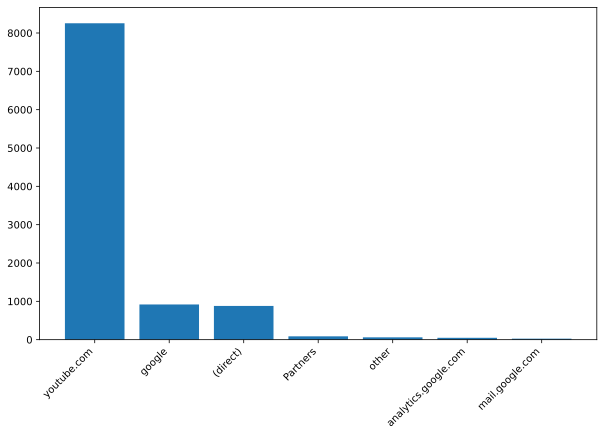

In [31]:
# Sources:

sources = pd.DataFrame(df1.Source.value_counts(ascending=False))

#Plotting:

plt.figure(figsize=(10,6),dpi=70),
plt.style.use('default')
plt.bar(sources.index,sources.Source)
plt.xticks(rotation=45, ha='right');

In [11]:
#source = {"youtube.com": 0, "google": 1,"(direct)": 2, "Partners": 3,"analytics.google.com": 4, "other": 5,"google.com": 6, "mail.google.com": 7}
#data = [df1]

#for dataset in data:
    #dataset['Source'] = dataset['Source'].map(source)

#  OPERATING SYSTEMS #

In [32]:
sizes = df1["OperatingSystem"].value_counts()

bad = sizes.index[sizes < 41]

df1.loc[df1["OperatingSystem"].isin(bad), "OperatingSystem"] = "(not set)"

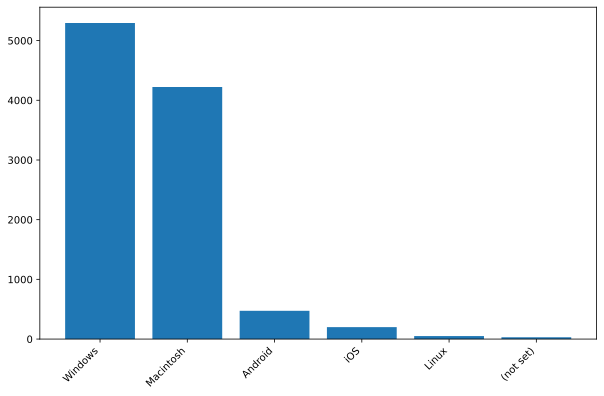

In [33]:
# Operating systems:

systems = pd.DataFrame(df1.OperatingSystem.value_counts(ascending=False))

#Plotting:

plt.figure(figsize=(10,6),dpi=70),
plt.style.use('default')
plt.bar(systems.index,systems.OperatingSystem)
plt.xticks(rotation=45, ha='right');

#  BROWSERS #

In [34]:
sizes = df1["Browser"].value_counts()

bad = sizes.index[sizes < 50]

df1.loc[df1["Browser"].isin(bad), "Browser"] = "other"

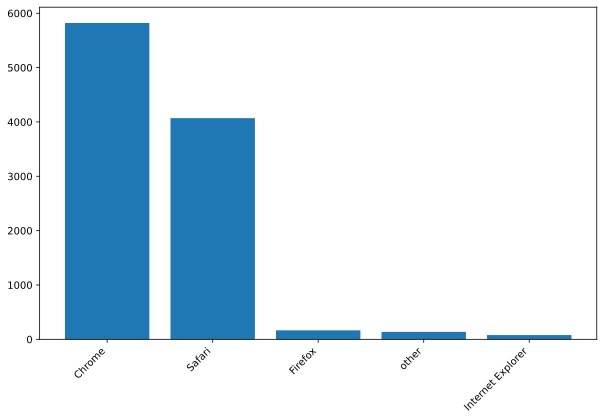

In [35]:
#Browsers:

browsers = pd.DataFrame(df1.Browser.value_counts(ascending=False))


#Plotting:

plt.figure(figsize=(10,6),dpi=70),
plt.style.use('default')
plt.bar(browsers.index,browsers.Browser)
plt.xticks(rotation=45, ha='right');

# STATES #

In [36]:
sizes = df1["State"].value_counts()

bad = sizes.index[sizes < 100]

df1.loc[df1["State"].isin(bad), "State"] = "Random Cities"

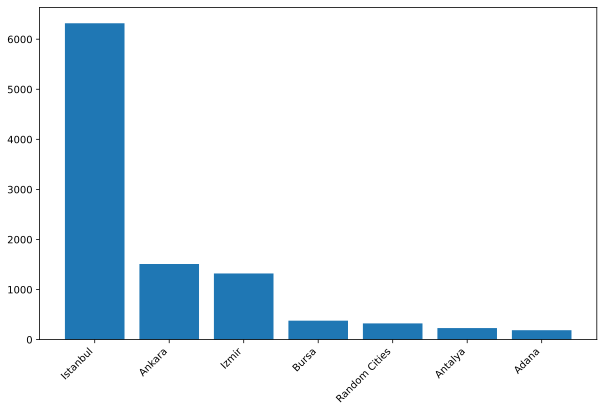

In [37]:
#Browsers:

states = pd.DataFrame(df1.State.value_counts(ascending=False))


#Plotting:

plt.figure(figsize=(10,6),dpi=70),
plt.style.use('default')
plt.bar(states.index,states.State)
plt.xticks(rotation=45, ha='right');

# Filtering features to use in K means clustering:

In [38]:
df_Kmeans = pd.get_dummies(df1, columns=["Source","Medium","Device","OperatingSystem","Browser","Channel","State"])


In [39]:
df_Kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10271 entries, 0 to 20520
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VisitNumber                  10271 non-null  int64  
 1   Orders                       10271 non-null  int64  
 2   PageViews                    10271 non-null  int64  
 3   Visits                       10271 non-null  int64  
 4   DurationMinutes              10271 non-null  float64
 5   Sales                        10271 non-null  float64
 6   Source_(direct)              10271 non-null  uint8  
 7   Source_Partners              10271 non-null  uint8  
 8   Source_analytics.google.com  10271 non-null  uint8  
 9   Source_google                10271 non-null  uint8  
 10  Source_mail.google.com       10271 non-null  uint8  
 11  Source_other                 10271 non-null  uint8  
 12  Source_youtube.com           10271 non-null  uint8  
 13  Medium_(none)   

In [40]:
# Using Min - Max scaler to scale features:

from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
df_std = scaler.fit_transform(df_Kmeans)

In [42]:
df_std = pd.DataFrame(data = df_std,columns = df_Kmeans.columns)


In [43]:
dict = {}
for i in range(1,10):
  num_clusters = i
  km = KMeans(n_clusters=num_clusters)
  km.fit(df_std)
  #display_cluster(X,km,num_clusters)
  print(km.inertia_)
  dict.update({i:km.inertia_})

28608.210020844905
19611.88139983593
13117.300765295266
11256.237015447408
10350.598009861711
8629.161966953903
8029.329071794942
7463.625558259691
6913.567896900566


# Using elbow method to decide how many cluster will be used 

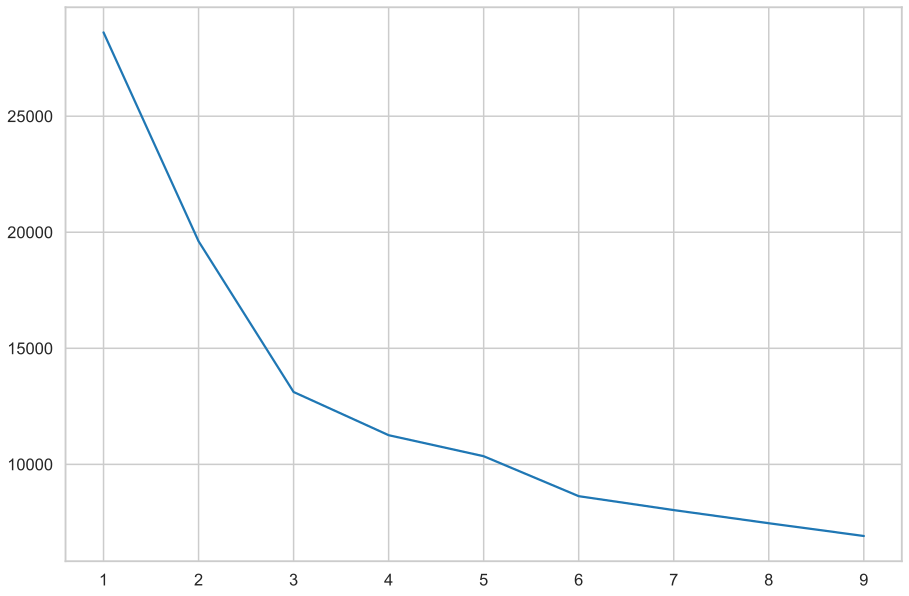

In [47]:
myList = dict.items()
x, y = zip(*myList) 

plt.plot(x, y)
plt.show()

In [48]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)


In [49]:
kmeans.fit(df_std)


KMeans(n_clusters=6, random_state=42)

In [51]:
df_std.head(3)

,VisitNumber,Orders,PageViews,Visits,DurationMinutes,Sales,Source_(direct),Source_Partners,Source_analytics.google.com,Source_google,...,Channel_Paid Search,Channel_Referral,Channel_Social,State_Adana,State_Ankara,State_Antalya,State_Bursa,State_Istanbul,State_Izmir,State_Random Cities
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


# Creating segments for users:

In [52]:
df_segm_kmeans= df_std.copy()
df_std["Segment"] = kmeans.labels_

In [53]:
df_segm_analysis = df_std.groupby(['Segment']).mean()
df_segm_analysis

,VisitNumber,Orders,PageViews,Visits,DurationMinutes,Sales,Source_(direct),Source_Partners,Source_analytics.google.com,Source_google,...,Channel_Paid Search,Channel_Referral,Channel_Social,State_Adana,State_Ankara,State_Antalya,State_Bursa,State_Istanbul,State_Izmir,State_Random Cities
Segment,,,,,,,,,,,,,,,,,,,,,
0,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.05,0.38,0.06,0.10,0.00,0.34,0.09
1,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.02,0.00,0.03,0.00,0.03,0.00,0.91,0.08,0.00,0.00,...,0.02,0.02,0.00,0.01,0.08,0.01,0.01,0.83,0.05,0.01
3,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.00,...,0.00,0.03,0.97,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.03,0.21,0.03,0.06,0.63,0.00,0.05
5,0.01,0.00,0.03,0.00,0.03,0.00,0.00,0.00,0.00,0.99,...,0.01,0.00,0.00,0.00,0.08,0.02,0.01,0.84,0.04,0.00


In [55]:
df_segm_analysis = df_segm_analysis.reset_index()

# Labelling segments according to results:

In [56]:
source = {0: "At Risk", 1: "Promising",2: "Potential Loyalists", 3: "Loyal Customers",4: "Can\'t Lose", 5: "No matter what Keep Them!"}
data = [df_segm_analysis]

for dataset in data:
    dataset['Segment'] = dataset['Segment'].map(source)

In [57]:
df_segm_analysis.head(10)

,Segment,VisitNumber,Orders,PageViews,Visits,DurationMinutes,Sales,Source_(direct),Source_Partners,Source_analytics.google.com,...,Channel_Paid Search,Channel_Referral,Channel_Social,State_Adana,State_Ankara,State_Antalya,State_Bursa,State_Istanbul,State_Izmir,State_Random Cities
0,At Risk,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.05,0.38,0.06,0.10,0.00,0.34,0.09
1,Promising,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,Potential Loyalists,0.02,0.00,0.03,0.00,0.03,0.00,0.91,0.08,0.00,...,0.02,0.02,0.00,0.01,0.08,0.01,0.01,0.83,0.05,0.01
3,Loyal Customers,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,...,0.00,0.03,0.97,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,Can't Lose,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.03,0.21,0.03,0.06,0.63,0.00,0.05
5,No matter what Keep Them!,0.01,0.00,0.03,0.00,0.03,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.08,0.02,0.01,0.84,0.04,0.00


In [ ]:
df1.cluster.value_counts()

0    20522
Name: cluster, dtype: int64

# BESIDES ALL FEATURES I WANTED TO TRY WITH ONLY NUMERIC FEATURES :

In [59]:
df2 = df1.filter(["VisitNumber", "PageViews","DurationMinutes"])

In [60]:
# Let's use Standard Scaler:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2_std = scaler.fit_transform(df2)

In [61]:
df2_std = pd.DataFrame(data = df2_std,columns = df2.columns)


In [77]:
dict = {}
for i in range(1,10):
  num_clusters = i
  km = KMeans(n_clusters=num_clusters)
  km.fit(df_std)
  #display_cluster(X,km,num_clusters)
  print(km.inertia_)
  dict.update({i:km.inertia_})

54885.770531019305
32093.030309120342
22981.985008240936
16236.478235656337
11629.83230067404
9090.575126619951
8079.328921868648
7490.809710189287
6940.128335272902


In [63]:
# Let's check decent cluster number and see it will differ:

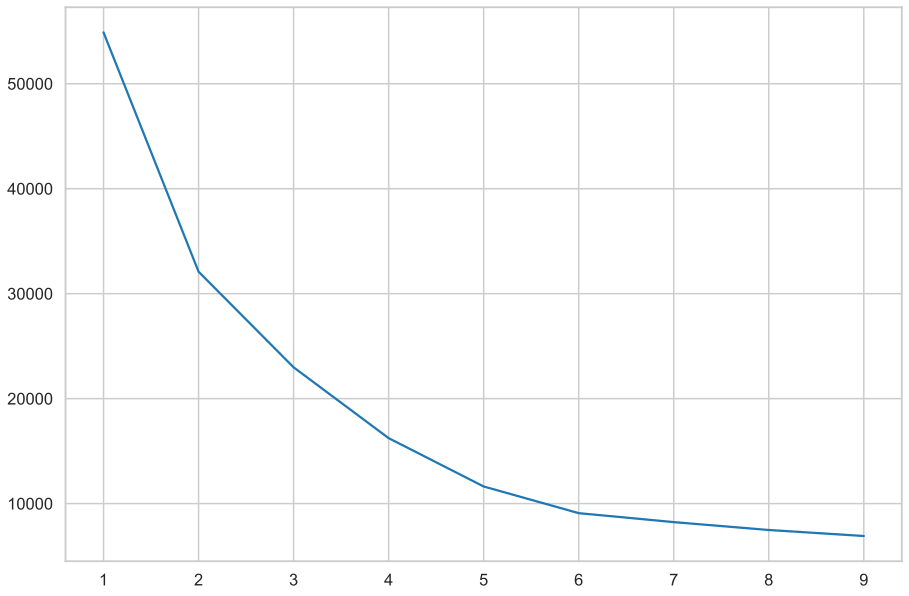

In [64]:
myList = dict.items()
x, y = zip(*myList) 

plt.plot(x, y)
plt.show()

In [118]:
# Same result!

In [65]:
kmeans2 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)


In [66]:
kmeans.fit(df2_std)


KMeans(n_clusters=6, random_state=42)

In [119]:
# Let's create segments with K means segments:

In [79]:
df2_segm_kmeans= df2_std.copy()
df2_std["Segment"] = kmeans.labels_

In [111]:
df2_std

,VisitNumber,PageViews,DurationMinutes,Segment
0,-0.19,-0.30,-0.26,1
1,-0.19,-0.30,-0.26,1
2,-0.19,-0.30,-0.26,1
3,-0.19,-0.30,-0.26,1
4,-0.19,12.03,11.50,4
...,...,...,...,...
10266,-0.19,-0.30,-0.26,1
10267,-0.19,0.10,0.07,1
10268,-0.19,-0.30,-0.26,1
10269,-0.19,0.10,0.08,1


In [81]:
df2_segm_analysis = df2_std.groupby(['Segment']).mean()
df2_segm_analysis

,VisitNumber,PageViews,DurationMinutes
Segment,,,
0,-0.02,3.70,2.04
1,-0.14,-0.13,-0.13
2,0.15,1.74,8.47
3,3.26,-0.12,-0.11
4,0.37,13.00,8.27
5,11.66,0.35,0.46


In [82]:
df2_segm_analysis = df2_segm_analysis.reset_index()

In [83]:
df2_segm_analysis.head()

,Segment,VisitNumber,PageViews,DurationMinutes
0,0,-0.02,3.70,2.04
1,1,-0.14,-0.13,-0.13
2,2,0.15,1.74,8.47
3,3,3.26,-0.12,-0.11
4,4,0.37,13.00,8.27


In [84]:
df2_segm_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Segment          6 non-null      int64  
 1   VisitNumber      6 non-null      float64
 2   PageViews        6 non-null      float64
 3   DurationMinutes  6 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 320.0 bytes


In [ ]:
# Giving names for each cluster to see interpret better:

In [85]:
source = {0: "At Risk", 1: "Promising",2: "Potential Loyalists", 3: "Loyal Customers",4: "Can\'t Lose"}
data = [df2_segm_analysis]

for dataset in data:
    dataset['Segment'] = dataset['Segment'].map(source)

In [86]:
df2_segm_analysis.head()

,Segment,VisitNumber,PageViews,DurationMinutes
0,At Risk,-0.02,3.70,2.04
1,Promising,-0.14,-0.13,-0.13
2,Potential Loyalists,0.15,1.74,8.47
3,Loyal Customers,3.26,-0.12,-0.11
4,Can't Lose,0.37,13.00,8.27


In [ ]:
# As a result of our analysis, for each segment of users we can define marketing strategies such as campaigns, discounts and etc.